# Exercise: Dataset Basics

In the previous exercise we loaded some data and fit a model to it. Several aspects of this were simplified - particularly that the data was hard-coded into our python script, and we didn't spend any time really looking at the data itself.

Here we will walk through how to load data from file, filter it, and graph it. Doing so is a very important first step in order to build proper models, or to understand their limitations.

As normal, in the examples below, there is no need to edit any code. Try to read it, understand it, then press the run button to run it. As always, it is vitally important that these code blocks are run in the correct order, and nothing is missed.

## Loading data with Pandas

There are large variety of libraries that help you work with data. In Python, one of the most common is _Pandas_. We used pandas briefly in the previous exercise. Pandas can open data saved as text files and store them in an organised table called a `dataframe`.

Let's open some text data that is stored on disk. Our data is saved in a file called `shoe-size-height.csv`.

In [1]:
import pandas

# Read the text file containing data using pandas
dataset = pandas.read_csv('Data/shoe-size-height.csv')

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head()

,shoe_size_eu,height,sex,age_years
0,39,173,male,60
1,38,173,male,48
2,37,157,female,43
3,39,175,male,51
4,38,170,male,39


As you can see, this dataset contains information about people, including their shoe size (European), height, sex, and age in years.

Data are stored as columns and rows, similar to a table you might see in Excel.

## Filtering data by Columns

Data are easy to filter by columns. We can either type this directly, like `dataset.my_column_name`, or like so: `dataset["my_column_name"]`.

We can use this to either extract data, or to delete data.

Lets take a look at the shoe sizes, and delete the `sex` and `age_years` columns. 

In [2]:

# Look at the shoe sizes
print("Shoe sizes")
print(dataset.shoe_size_eu)

# Remove the sex and age-in-years columns.
del dataset["sex"]
del dataset["age_years"]

# Print the column names
print("\nAvailable columns after deleting sex and age information:")
print(dataset.columns.values)


Shoe sizes
0     39
1     38
2     37
3     39
4     38
5     35
6     37
7     36
8     35
9     40
10    40
11    36
12    38
13    39
14    42
15    42
16    36
17    36
18    35
19    41
20    42
21    38
22    37
23    35
24    40
25    36
26    35
27    39
28    41
29    37
30    35
31    41
32    39
33    41
34    42
35    42
36    36
37    37
38    37
39    39
40    42
41    35
42    36
43    41
44    41
45    41
46    39
47    39
48    35
49    39
Name: shoe_size_eu, dtype: int64

Available columns after deleting sex and age information:
['shoe_size_eu' 'height']



## Filtering data by Rows

We can get data from the top of the table by using the `head()` function, or from the bottom of the table by using the `tail()` function. 

Both functions make a shallow copy of a section of our dataframe. Here we sending these copies to the `print()` function, the head and tail views can also be used for other purposes, such as for use in analyses or graphs.

In [8]:
# Print the data at the top of the table
print("TOP OF TABLE")
print(dataset.head())

# print the data at the bottom of the table
print("\nBOTTOM OF TABLE")
print(dataset.tail())

TOP OF TABLE
   shoe_size_eu  height
0            39     173
1            38     173
2            37     157
3            39     175
4            38     170

BOTTOM OF TABLE
    shoe_size_eu  height
45            41     170
46            39     175
47            39     171
48            35     154
49            39     176


We can also filter logically. For example, we can look at data for people under 163cm tall.

This works by calculating a `True` or `False` value for each row, then keeping only those rows where the value is `True`.

In [10]:
# Print how many rows of data we have
print(f"We have {len(dataset)} rows of data")

# Determine whether each person is < 163cm tall
# This creates a True or False value for each row where True means 
# they are shorter than 163cm
is_short = dataset.height < 163
print("\nWhether the person was shorter than 163cm:")
print(is_short)

# Now apply this 'mask' to our data to keep the shorter people
data_from_short_people = dataset[is_short]
print("\nData for people who are shorter than 163cm:")
print(data_from_short_people)

# Print the number of short people
print(f"\nNumber of people less than 163cm tall: {len(data_from_short_people)}")

We have 50 rows of data

Whether the person was shorter than 163cm:
0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: height, dtype: bool

Data for people who are shorter than 163cm:
    shoe_size_eu  height
2             37     157
5             35     155
7             36     159
8             35     147
9             40     162
12            38     158
17            36     153
18            35     149
23            35     151
25         

This looks like a lot of code, but we can compress the important parts into a single line.

Let's do something similar - restrict our data to only those with shoe sizes smaller than 39 cm. 

In [5]:
# Make a copy of the dataset that only contains people with 
# shoe sizes below an EU 39
# The call to copy() is optional but can help avoid unexpected
# behaviour in more complex scenarios
data_smaller_feet = dataset[dataset.shoe_size_eu < 39].copy()


# Print information about this
print(f"We now have {len(data_smaller_feet)} rows in our dataset. The last few rows are:")
data_smaller_feet.tail()

We now have 25 rows in our dataset. The last few rows are:


,shoe_size_eu,height
37,37,170
38,37,171
41,35,152
42,36,156
48,35,154


## Graphing Data

Graphing data is often the easiest way to understand it. Graphing can require many lines of code, because many options are available.

When getting started, usually the best way is to find an example and modify it to meet your needs.

Lets make a simple graph of shoe size versus height, for our people with smaller feet. 

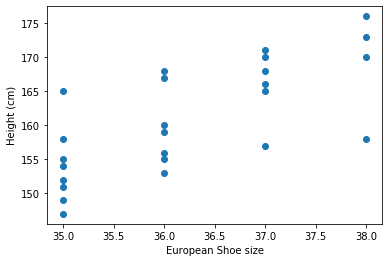

In [12]:
# Load and prepare matplotlib to create our graphs
import matplotlib.pyplot as graph
import pandas.plotting
pandas.plotting.register_matplotlib_converters()

# Show a graph of height by shoe size:
# -- This first line is a special command that lets this work in Jupyter Notebooks
%matplotlib inline
# -- Create a scatter plot
graph.scatter(data_smaller_feet.shoe_size_eu, data_smaller_feet.height)
# -- Add some labels
graph.ylabel('Height (cm)')
graph.xlabel("European Shoe size")
# -- Show the graph on screen
graph.show()

## Creating New Columns

The graph above shows the relationship we want to investigate for our shoe store, but the units are all wrong - we sell shoes in US sizes! How can we view these shoe sizes in US sizes?

To do this, we will need to create a new column - `shoe_size_USA` - and put that on the X axis instead.

Creating new columns uses very similar syntax to what we've seen before.

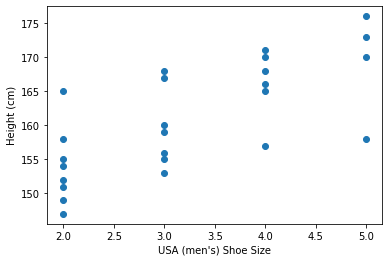

In [13]:
# Convert shoe sizes from European men's to USA men's sizes 
# and save the result to a new column
data_smaller_feet['shoe_size_USA'] = data_smaller_feet.shoe_size_eu - 33

# Show a graph of min temperature by day of the year:
# -- Create a scatterplot
graph.scatter(data_smaller_feet.shoe_size_USA, data_smaller_feet.height)
# -- Add some labels
graph.ylabel('Height (cm)')
graph.xlabel("USA (men's) Shoe Size")
# -- Show
graph.show()

We've now graphed our new column of data (USA shoe sizes) against height for people with small feet. Unsurprisingly, it seems most these people are relatively short.


## Summary

We've covered the basics of working with data in Python. This has included:
* Opening tablated data from a file into a _dataframe_ (table)
* Inspecting the top and bottom of the dataframe
* Adding and removing columns of data
* Removing rows of data based on criteria
* Graphing data to understand trends

Learning to work with dataframes can feel tedious or dry, but keep going because these basic skills are critical to unlocking exciting machine learning techniques that we will cover in later modules.